# Regressão Linear Múltipla

Ao contrário dos problemas do capítulo 2, neste caso existem múltiplas variáveis de entrada. Um problema deste tipo, por exemplo, consiste em determinar um modelo que mapeia o preço dos imóveis não somente em função do seu tamanho, mas também da quantidade de quartos, banheiros, etc. Ou seja, o modelo deve ser composto da combinação linear de todas as variáveis de entrada do problema, conforme segue.

$$
\begin{align} 
\theta = \begin{bmatrix} \theta_{1} \\ \theta_{2} \\ . \\ . \\ \theta_{n+1} \end{bmatrix} && 
x = \begin{bmatrix} 1 \\ x_{1} \\ . \\ . \\ x_{n} \end{bmatrix} && 
h_{\theta}(x) = \theta^{T} x
\end{align}$$

$$h_{\theta}(x) = \theta_{1} + \theta_{2} x_{1} + ... + \theta_{n+1} x_{n}$$

Uma forma de interpretar este modelo no contexto do estimador de preço dos imóveis é: considerando $x_{1}$ o tamanho em metros quadrados da casa e $x_{2}$ a quantidade de quartos, $\theta_{1}$ seria o preço base da casa, $\theta_{2}$ o preço por metro quadrado, $\theta_{3}$ o preço por cada quarto adicional, e assim por diante. 


O Gradiente para a função custo na regressão linear múltipla pode ser obtido conforme segue:

$$J(\theta) = \frac{1}{2 m} \sum\limits_{i=1}^{m}(h_{\theta}(x^{i}) - y^{i})^{2} = \frac{1}{2 m} \sum\limits_{i=1}^{m}(\theta^T x^{i} - y^{i})^{2}$$

$$\nabla J(\theta) = \begin{bmatrix} \frac{\partial J}{\partial \theta_1} & \frac{\partial J}{\partial \theta_2} & ... &  \frac{\partial J}{\partial \theta_{n+1}}\end{bmatrix}^T = \begin{bmatrix} \frac{1}{m} \sum\limits_{i=1}^{m}(\theta^T x^{i} - y^{i}) & \frac{1}{m} \sum\limits_{i=1}^{m}(\theta^T x^{i} - y^{i}) x_{1}^{i} & ... & \frac{1}{m} \sum\limits_{i=1}^{m}(\theta^T x^{i} - y^{i}) x_{n}^{i} \end{bmatrix}^T$$

## Normalização do Conjunto de Treinamento

Conforme já discutido, a função custo é estimada para um determinado conjunto de dados treinamento através da variação dos parâmetros $\theta$ do modelo. Ademais, na regressão linear univariada de modelo $h_{\theta}(x) = \theta_{1} + \theta_{2} x$, foi possível verificar que devido a multiplicação pela variável de entrada, $\theta_2$ provoca um impacto maior no custo se comparada a $\theta_1$. Como consequência, a curva de custo na direção $\theta_2$ é mais acentuada, conforme mostrado pela figura abaixo.

<img src="imgs/linear_regression_cost_function.png" alt="linear_model" width="400" style="display:block; margin:auto"/>

<div align="center">
Gráfico da função custo para regressão linear.
</div>

Com a inspeção da figura acima também é possível notar que uma curva mais suave, como a de $\theta_{1}$, necessita de mais iterações do algoritmo gradiente descendente para atingir o mínimo da função. No caso da regressão linear mútipla este problema fica ainda mais evidente, afinal a inclinação da curva custo pode ser impactada também pelo **range de variação do conjunto de treinamento**.

Com o objetivo de verificar a dependência da função custo para com o range de variação das entradas, as funções a seguir mostram o seu comportamento para um cojunto de treinamento arbitrário dado o modelo de regresão linear múltipla: $h_{\theta}(x) = \theta_{2} x_{1} + \theta_{3} x_{2}$.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# multiple linear regression hypothesis: o2*x1 + o3*x2
def h(x, o):
    return np.dot(x, o) # mx2 . 2x1 -> mx1

# J = MSE/2
def J(x, o, y):
    m = np.shape(x)[0]
    h_x = h(x, o)
    return np.sum(np.power(h_x - y, 2), axis=0)*1/(2*m)

def dJ(x, o, y):
    m = np.shape(x)[0]
    h_x = h(x, o)
    x = np.transpose(x) # mx2 -> 2xm
    e = h_x - y # mx1
    dJ = np.dot(x, e)*1/m # 2xm . mx1 = 2x1
    return dJ

def plot_route(x, o_hist, y):
    # arbitrary data to visualize cost function
    o2 = np.arange(-10, 10, 0.25)
    o3 = np.arange(-10, 10, 0.25)

    # prepare data in meshgrid format
    X, Y = np.meshgrid(o2, o3)
    
    # serialize meshgrid to use J
    c_o = np.power(len(o2), 2)
    o = np.zeros((2, c_o))
    o[0, :] = np.reshape(X, [1, c_o])
    o[1, :] = np.reshape(Y, [1, c_o])
    j = J(x, o, y)

    # transform j to meshgrid
    Z = np.reshape(j, np.shape(X))
    
    # get gradient descent route
    j = J(x, o_hist, y)
        
    # plot
    fig = plt.figure(figsize=(20,10))
    # surface
    ax = fig.add_subplot(121, projection='3d')
    ax.set_xlabel(r'$\theta_{2}$')
    ax.set_ylabel(r'$\theta_{3}$')
    
    ax.plot_surface(X, Y, Z, alpha=0.2)
    ax.plot(o_hist[0,:], o_hist[1,:], j, linestyle='--', marker='o')
    
    # plot contours    
    ax = fig.add_subplot(122)
    levels = [10, 50, 100, 250, 500, 750, 1000] # to improve view 
    contours = ax.contour(X, Y, Z, levels, colors='black')
    ax.plot(o_hist[0,:], o_hist[1,:], '*')

    plt.clabel(contours, inline = True, fontsize = 10)
    plt.xlabel(r'$\theta_{2}$')
    plt.ylabel(r'$\theta_{3}$')

def gradient_descent(x, o, y, alpha, min_grad, max_iterations):
    i = 0
    o_hist = o
    grad = dJ(x, o, y)
    while np.linalg.norm(grad) > min_grad and i < max_iterations:
        o = o - alpha*grad
        o_hist = np.c_[o_hist, o] # append column

        grad = dJ(x, o, y)
        i += 1
        
    return [o, o_hist, i]

Primeiramente verificaremos o comportamento da função custo para um modelo em que $\theta = \begin{bmatrix}0 & 1 &  1\end{bmatrix}^T$, ou seja, $h_{\theta}(x) = x_{1} + x_{2}$ em que as entradas $x_{1}$ e $x_{2}$ presentes no conjunto de conjunto de treinamento possuem o mesmo range.

iterations: 16


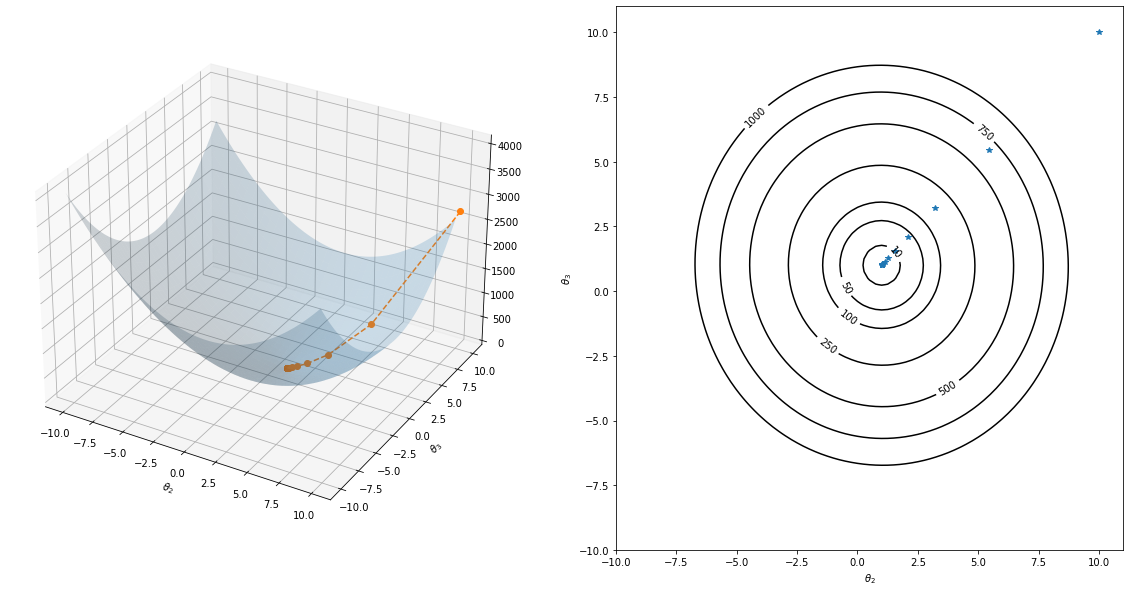

In [10]:
# model o
o2 = 1
o3 = 1
o = np.array([[o2],[o3]])
# execute gradient descent to minimize o
o_start = [[10],[10]] # arbitrary start
# config gradient descent
max_iterations = 10000
alpha = 1.5e-2   # good learning rate
min_grad = 1.0e-2

# same range 
x = np.mgrid[-10:10:1, -10:10:1].reshape(2,-1).T # mx2
y = h(x,o)
[min_o, o_hist_gd, iterations] = gradient_descent(x, o_start, y, alpha, min_grad, max_iterations)
print('iterations:', iterations)
plot_route(x, o_hist_gd, y)

Com o range de $[-10, 10]$ aplicado a ambas as entradas as inclinações refletidas na função custo são idênticas fazendo com que o gradiente descendente opere na condição ótima, ou seja, realizando deslocamentos de mesmo módulo em ambas as direções. A seguir é mostrado a minimização do mesmo modelo, porém neste caso o conjunto de treinamento apresenta entradas com ranges distintos.

iterations: 149


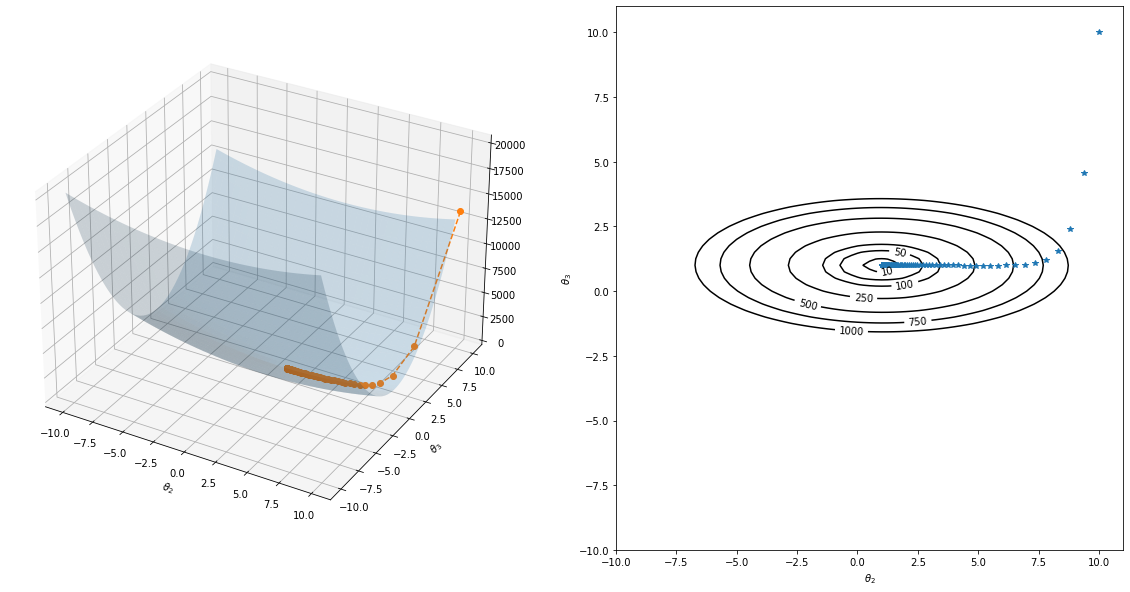

In [11]:
# different ranges
alpha = 2e-3   # changed learning rate to prevent divergence
x = np.mgrid[-10:10:1, -30:30:3].reshape(2,-1).T # mx2
y = h(x,o)
[min_o, o_hist_gd, iterations] = gradient_descent(x, o_start, y, alpha, min_grad, max_iterations)
print('iterations:', iterations)
plot_route(x, o_hist_gd, y)

Com um range 3x maior de $x_{2}$ em relação $x_{1}$ as variações de $\theta_{3}$ resultam em um impacto maior sobre a função custo quando comparado a $\theta_{2}$, como consequência é possível constatar uma inclinação muito maior da função na direção de $\theta_{3}$. Outra forma de verificar a distorção é formato elipsoidal assumido pelas curvas de nível.

A comparação entre a quantidade de iterações necessárias para minimização de cada cenário deixa claro que um
pré-processamento dos dados de treinamento se faz necessário quando existe disparidade entre os ranges das variáveis de entrada.